# Multi-Label Classification for Book Genre Prediction
***
Martha Gavidia <br>
Tangible A.I. Summer 2021 Internship Project


## Introduction

In NLP, many of the text classification problems that I've seen and worked on have been binary meaning that there are just two categories we want our model to predict. Whether it's detecting real vs. fake news, spam vs. not spam, euphemistic vs. non euphemistic. These problems are difficult but training a machine learning model to predict between two target variables is more straight forward than that of multi-label classification.  Multi-label classification is often seen in computer vision problems when we want to detect more than one item in an image.  This differs from multi-class classification as well in that one instance can have multiple tags associated with it as opposed to only belonging to one single class.

<b> Problem Statement:</b> The aim of this project is to build a machine learning model that will determine the genre of a book based on its summary and/or title.  In practice this model can be beneficial for recommender systems where we have a user that is looking for a book based on a genre of their liking or even for authors and publishers who want to make sure that the synopsis and title of book are in line with their target audience making the book not only more enticing but also easier to find.

## Data

The data used for this project is the CMU Book Summary Dataset.  This dataset contains plot summaries for 16,559 books extracted from Wikipedia, along with aligned metadata from Freebase, including book author, title, and genre and can be found at https://www.cs.cmu.edu/~dbamman/booksummaries.html.

The following is an example of an instance of a book in the dataset taken from the CMU website:<br>
<br>



## Exploratory Data Analysis

Now, let's dig a little deeper into our data to understand what we are dealing with.  Here we can upload the dataframe containing all of the book summaries and decide what information we want to keep.

In [5]:
import pandas as pd
df = pd.read_csv(r'booksummaries.csv')
df.dropna(inplace= True)
df.head(10)

wiki_article_id freebase_id                         book_title  \
0              620     /m/0hhy                        Animal Farm   
1              843     /m/0k36                 A Clockwork Orange   
2              986     /m/0ldx                         The Plague   
5             2152     /m/0x5g     All Quiet on the Western Front   
6             2890    /m/011zx               A Wizard of Earthsea   
8             4081    /m/01b4w    Blade Runner 3: Replicant Night   
9             4082    /m/01b56  Blade Runner 2: The Edge of Human   
20            6020    /m/01t5z                              Crash   
21            6628    /m/01y92                   Children of Dune   
22            6629    /m/01y9j            Candide, ou l'Optimisme   

                  author publication_date  \
0          George Orwell          8/17/45   
1        Anthony Burgess             1962   
2           Albert Camus             1947   
5   Erich Maria Remarque          1/29/29   
6      Ursula K. Le Guin             1968   
8            K. W. Jeter          10/1/96   
9            K. W. Jeter          10/1/95   
20         J. G. Ballard             1973   
21         Frank Herbert             1976   
22              Voltaire          1759-01   

                                                genre  \
0   {"/m/016lj8": "Roman \u00e0 clef", "/m/06nbt":...   
1   {"/m/06n90": "Science Fiction", "/m/0l67h": "N...   
2   {"/m/02m4t": "Existentialism", "/m/02xlf": "Fi...   
5   {"/m/098tmk": "War novel", "/m/016lj8": "Roman...   
6   {"/m/0dwly": "Children's literature", "/m/01hm...   
8   {"/m/06n90": "Science Fiction", "/m/014dfn": "...   
9   {"/m/06n90": "Science Fiction", "/m/014dfn": "...   
20  {"/m/014dfn": "Speculative fiction", "/m/02xlf...   
21  {"/m/06n90": "Science Fiction", "/m/014dfn": "...   
22  {"/m/06nbt": "Satire", "/m/01jym": "Bildungsro...   

                                         plot_summary  
0    Old Major, the old boar on the Manor Farm, ca...  
1    Alex, a teenager living in near-future Englan...  
2    The text of The Plague is divided into five p...  
5    The book tells the story of Paul Bäumer, a Ge...  
6    Ged is a young boy on Gont, one of the larger...  
8    Living on Mars, Deckard is acting as a consul...  
9    Beginning several months after the events in ...  
20   The story is told through the eyes of narrato...  
21   Nine years after Emperor Paul Muad'dib walked...  
22   Candide contains thirty episodic chapters, wh...

For future work, the metadata from Freebase may be useful but for the purposes of this project we'll be focusing on the book title, the genre and the plot summary.  

In [27]:

print('There are', len(df), 'total summaries in our dataset after removing instances with null values.')
      


There are 9293 total summaries in our dataset after removing instances with null values.


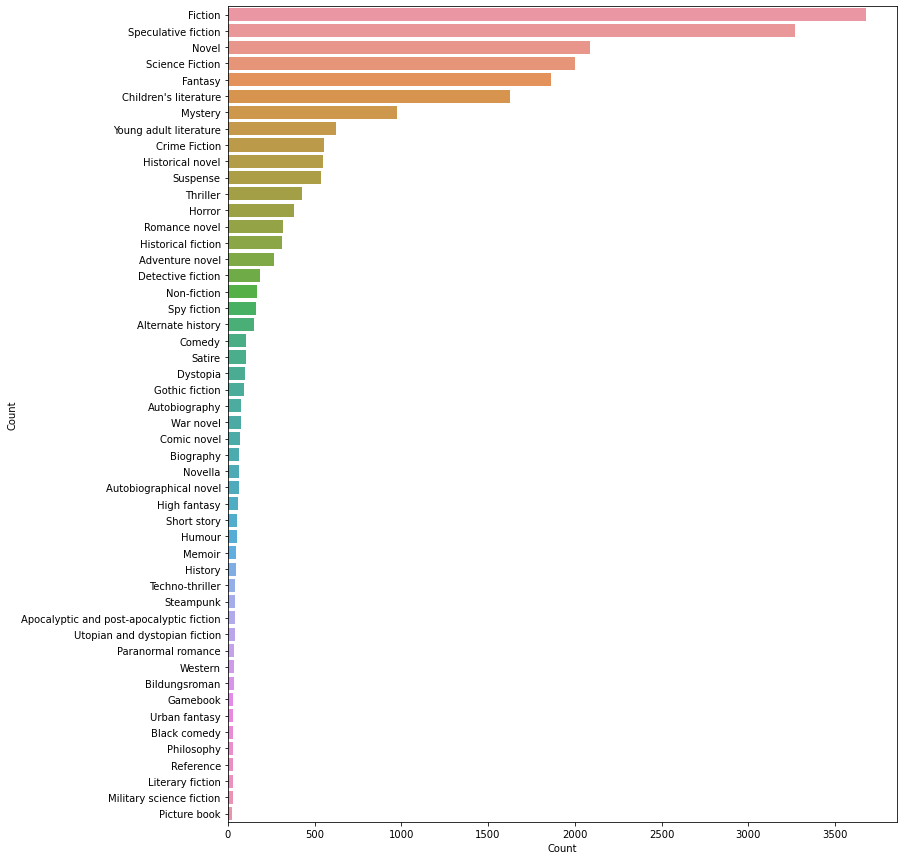

There are a total of 215 genres in this dataset.


Genre  Count
0                        Roman à clef     22
1                              Satire    102
2               Children's literature   1628
3                 Speculative fiction   3271
4                             Fiction   3675
..                                ...    ...
210   New York Times Best Seller list      1
211  Epic Science Fiction and Fantasy      1
212                    Alien invasion      1
213                             Prose      1
214                          Pastiche      1

[215 rows x 2 columns]

In [11]:
import json
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#clean genre column
"""
read in the values of each row and append to empty dictionary; this dictionary will
then be the new cleaned genre column
"""
genre_list = []

for genres in df["genre"]:
    x = list(json.loads(genres).values())
    genre_list.append(x)
    
#add clean genre column
df['clean_genre'] = genre_list

all_genres = sum(genre_list,[])

#find out distribution of genres
all_genres = nltk.FreqDist(all_genres)

all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 'Count': list(all_genres.values())})

#Plotting genres
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

print('There are a total of', len(set(all_genres)), 'genres in this dataset.')

#find out distribution of genres
all_genres = nltk.FreqDist(all_genres)

all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 'Count': list(all_genres.values())})
all_genres_df

In order to give our model a better chance at correctly predicting the genre we will further clean them because as we see from the snippet above there exist genres such as Alien Invasion, Pastiche and other that only have one book associated with them.  With only 1 book per genre we are unable to make sure that our split this data to provide our model with an instance in both the training and test sets.  Below we'll plot the genres that have at least 20 books associated with it.

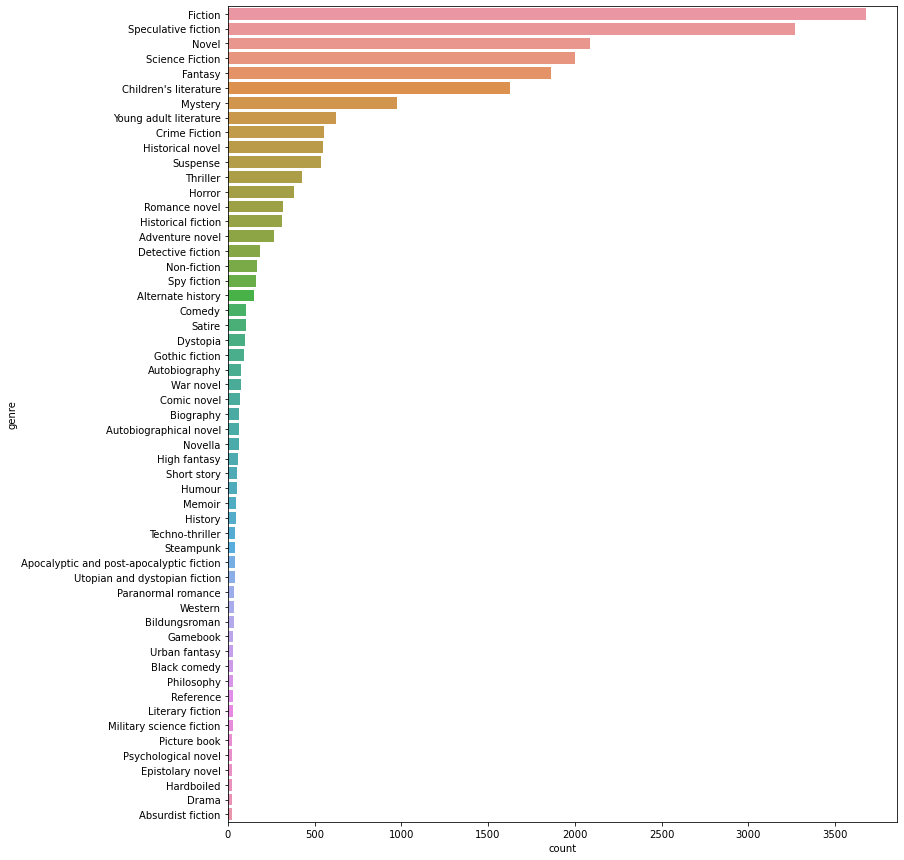

There are now a total of 55 genres in this dataset.


In [21]:
df2 = pd.read_csv('newdf.csv', index_col=False, converters={'clean_genre':eval})
def to_1d(series):
    return pd.Series([x for _list in series for x in _list])
genre_df = pd.DataFrame(to_1d(df['clean_genre']).value_counts())
genre_df.reset_index(inplace=True)
genre_df.columns = ['genre', 'count']
g = genre_df.nlargest(columns="count", n = 55) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "count", y = "genre") 
plt.show()

print('There are now a total of 55 genres in this dataset.')

We can now see there are 55 genres with at least 20 books associated with it. This will help our model; however, there is still a large imbalance in the data, while some books have just about 20 books per genre others have several thousand.  We will continue with this imbalance to see how our mode performs but for future work more data and a much more balanced dataset may produce better results.

This is a multilabel classification after all so let's see the distribution of genre tags in the data.  Some books may have only one genre assigned to it while others may have more than one.

<AxesSubplot:xlabel='Genres per summary'>

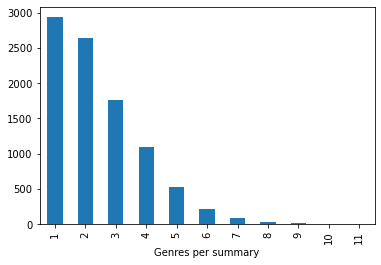

In [22]:
df['genre_count'] = df['clean_genre'].apply(len)
df['genre_count'].value_counts().plot(kind = 'bar', xlabel= 'Genres per summary')

In the plot above we can see that many books do have just one genre but there are some instances that have up to 11.

## Preprocessing and Feature Creation

In academia we're taught that whenever dealing with text data, we always have to clean it which includes lowercasing all text, removing stop words, removing puntuation, removing numbers or any othe rspecial characters.  I want to explore how my model behaves when our plot summaries are left as they are but also whether or not our model improves when we remove some noise from the text.  <br>
<br>
For preprocessing I've decided to only remove contractions but keep all other punctuation, lowercase all the words as well as stemming our plot summaries so that our model does not get words like killing, killed, killer but rather just kill.  This will reduce our data and hopefully make the model perform better.
<br>
In addition to the simple preprocessing discussed above I will also be creating features from the text which include:
- character count of the plots<br>
- word count of the plots<br>
- word density - the character count/ word count<br>
- sentence count<br>
- unique word count <br>
- ratio of unique words to total number of words <br>
- noun count <br>
- verb <br>
- positive sentiment
- negative sentiment
- neutral sentiment
- compound score - which is the sum of the positive, negative, and neutral scores
- spacy vectors on the book title

In order to calculate these features I use pythons NLTK library including the SnowballStemmer for stemming our vocabulary.  For the sentiment scores, I use the VADER sentiment python library.  Finally, I created spacy vectors for the book titles.<br>
<br>
These features will all be numerical of course which can easily be input into our ML model.<br>
<br>
Below is our new dataframe with all of our features:<br>
<br>

In [45]:
fulldf= pd.read_csv(r'full_book_df.csv',index_col= False)
del fulldf['Unnamed: 0']
fulldf.head(10)

author publication_date  \
0         George Orwell          8/17/45   
1       Anthony Burgess             1962   
2          Albert Camus             1947   
3  Erich Maria Remarque          1/29/29   
4     Ursula K. Le Guin             1968   
5           K. W. Jeter          10/1/96   
6           K. W. Jeter          10/1/95   
7         J. G. Ballard             1973   
8         Frank Herbert             1976   
9              Voltaire          1759-01   

                                        plot_summary  \
0   Old Major, the old boar on the Manor Farm, ca...   
1   Alex, a teenager living in near-future Englan...   
2   The text of The Plague is divided into five p...   
3   The book tells the story of Paul Bäumer, a Ge...   
4   Ged is a young boy on Gont, one of the larger...   
5   Living on Mars, Deckard is acting as a consul...   
6   Beginning several months after the events in ...   
7   The story is told through the eyes of narrato...   
8   Nine years after Emperor Paul Muad'dib walked...   
9   Candide contains thirty episodic chapters, wh...   

                                         clean_genre  \
0  ['Roman à clef', 'Satire', "Children's literat...   
1  ['Science Fiction', 'Novella', 'Speculative fi...   
2  ['Existentialism', 'Fiction', 'Absurdist ficti...   
3                      ['War novel', 'Roman à clef']   
4  ["Children's literature", 'Fantasy', 'Speculat...   
5         ['Science Fiction', 'Speculative fiction']   
6         ['Science Fiction', 'Speculative fiction']   
7        ['Speculative fiction', 'Fiction', 'Novel']   
8  ['Science Fiction', 'Speculative fiction', "Ch...   
9    ['Satire', 'Bildungsroman', 'Picaresque novel']   

                                       clean_summary  \
0  old major the old boar on the manor farm call ...   
1  alex a teenag live in near futur england lead ...   
2  the text of the plagu is divid into five part ...   
3  the book tell the stori of paul b umer a germa...   
4  ged is a young boy on gont one of the larger i...   
5  live on mar deckard is act as a consult to a m...   
6  begin sever month after the event in blade run...   
7  the stori is told through the eye of narrat ja...   
8  nine year after emperor paul muaddib walk into...   
9  candid contain thirti episod chapter which may...   

                         clean_title  char_count  word_count  word_density  \
0                        animal farm        5812         957      6.066806   
1                 a clockwork orange        6121         998      6.127127   
2                         the plague        6642        1119      5.930357   
3     all quiet on the western front        4283         770      5.555123   
4               a wizard of earthsea        5850        1066      5.482662   
5    blade runner 3: replicant night         319          56      5.596491   
6  blade runner 2: the edge of human        1786         291      6.116438   
7                              crash         659         105      6.216981   
8                   children of dune        3826         622      6.141252   
9             candide, ou loptimisme       10449        1714      6.092711   

   sent_count  ...  unique_vs_words  \
0          52  ...         0.502612   
1          42  ...         0.550100   
2          61  ...         0.515639   
3          41  ...         0.545455   
4          52  ...         0.495310   
5           3  ...         0.767857   
6          12  ...         0.601375   
7           4  ...         0.790476   
8          33  ...         0.549839   
9          76  ...         0.490082   

                                   summary_tokenized  \
0  ['Old', 'Major,', 'the', 'old', 'boar', 'on', ...   
1  ['Alex,', 'a', 'teenager', 'living', 'in', 'ne...   
2  ['The', 'text', 'of', 'The', 'Plague', 'is', '...   
3  ['The', 'book', 'tells', 'the', 'story', 'of',...   
4  ['Ged', 'is', 'a', 'young', 'boy', 'on', 'Gont...   
5  ['Living', 'on', 'Mars,', 'Deckard', 'is', 'ac...   


In [47]:
for col in fulldf.columns:
    print(col)

author
publication_date
plot_summary
clean_genre
clean_summary
clean_title
char_count
word_count
word_density
sent_count
unique_word_count
unique_vs_words
summary_tokenized
nouns
noun_count
verbs
verb_count
compound_score
pos_score
neg_score
neu_score


### Evaluation Metrics

Before we get into actually modeling our data, we should know how we are going to evaluate our model.  For binary classification we often focus on precision, recall and F1 scores but given that this is a multi-label classification problem, the metrics are a bit different.  For educational purposes I will calculate the accuracy score to see how the model performs but this metric is not entirely helpful since in order to get a correct instance the model will need to be able to get all of the genre tags right.  For a book that has 3 genres, if our model predicts 2 out of 3, it's great but our model will not count this as an accurate prediction.  <br>
<br>
We'll be using the F1 score as well as the hamming loss and a manual representation of the ratio of correctly predicted labels over the total number of label instances.<br>
<br>
For the F1 score, there are several ways to calculate.  There is the macro F1 score which calculates the metric for each label and finds the unweighted mean, micro F1 score calculates the metrics by counting the toal true positives, false negatives and false positives and a weighted F1 score calculates the metrics for each label and finds the average score by the number of true instances for each label.  Further explainaation on F1 scores can be found at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html.<br>
<br>

We will be calculating the micro F1 score as it should do better with our data imbalance.  In addtion to this we will be calculating the hamming loss which is explained here, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html.  The hamming loss is the fraction of labels that are incorrectly predicted.  This will count the fraction of incorrect labels over total labels and inversely Hobson helped me with manually calculating the ratio of correctly classified labels over the total number of labels which can be calculated with the follow line of code:

(~(y_test-y_pred).astype(bool)).sum()/y_test.shape[0]/y_test.shape[1]

## Modeling

#### TFIDF Vectorizer and CountVectorizer

In order to tranform our text data into numerical values to input to our models, we must first encode our data, we do this in two ways:  <br>
<br>
The first is by performing TFIDF or term frequency - inverse document frequency, this technique computes a weight for the words in our documents which signifies the importance of a word not only in the document but thorughout the entire corpus.<br>
<br>
We also will explore how a Count Vectorizer works, this is a simpler technique which simply transforms the text of a document into a vector on the basis of how many times a word appears in the text document.

#### OneVsRest and MultiLabel Binarizer

Given that many algorithms are designed for single label classification, we need to find a way to transform our data into something that can easily be fed into well known classifiers.  We do this with the OneVsRest classifier, this wraps our models and transforms our multi-label classification problem into multiple single label problems.  We can then treat each label as it's own target variable and see how our moel performs.  Before doing this, however, we must create these multiple target variables.  Using the MultiLabel Binarizer we are able to transform our genres into 55 separate target variables which we will then train our model on.

#### Linear Regression, Linear SVC and SGD

Below is the hyperparameter table displaying the models I ran, I experimented with Linear Regression, Linear SVC and SGD.  I chose to use the OneVsRest classifier to wrap each model.


In [41]:
results = pd.read_csv(r'results_table.csv', index_col= False)
del results['Unnamed: 0']
results

model classifier                            data vectorizer max_df  \
0   SVC        OVR                original summary      TFIDF    0.5   
1    LR        OVR                   clean summary      TFIDF    0.7   
2    LR        OVR                original summary      TFIDF    0.7   
3    LR        OVR                original summary      TFIDF    0.5   
4   SGD        OVR                   clean summary      Count          
5    LR        OVR                original summary      TFIDF    0.5   
6   SVC        OVR  all numerical features + tfidf                     
7   SVC        OVR          all numerical features                     
8   SVC        OVR             title spacy vectors                     
9    LR        OVR                    word density                     

           stop words class_weights  train_score  test_score  F1 score  \
0                          balanced     0.977296    0.178015  0.571723   
1  stop words removed      balanced     0.615670    0.159769  0.588358   
2  stop words removed      balanced     0.650245    0.166889  0.585720   
3                          balanced     0.453925    0.152203  0.587687   
4                                       0.503784    0.080107  0.396529   
5                          balanced     0.132661    0.032488  0.426849   
6                                       0.011574    0.008901  0.299760   
7                                       0.012168    0.009346  0.181409   
8                                       0.009942    0.004005  0.263571   
9                          balanced     0.000000    0.000000  0.095937   

   hamming_loss  ratio of correct pred max_features n-gram range  
0      0.033677               0.966323                            
1      0.035190               0.964810                            
2      0.035587               0.964413                            
3      0.037933               0.962067        10000               
4      0.041081               0.958919                            
5      0.062321               0.937679         2000        (2,2)  
6      0.066157               0.933843                            
7      0.085366               0.914634                            
8      0.126787               0.873213                            
9      0.431582               0.568418

As mentioned before, the accuracy score (test_score) is pretty low for all the runs of each model.  <br>
I expected this as it's probably that while the model may have correctly predicted some genres, predicting all of them per instance of a book is very difficult.  <br>
<br>
Looking at the metric of the ratio of correctly predicted labels, we see that the SVC model wrapped in the OneVsRest classifier gives us a score of 96% which is pretty good! Additionally, the hamming loss, which is the ratio of the incorrectly predicted labels is also low.<br>
<br>
Some take aways from this hyperparameter table are:
- the model performed best with the original unaltered plot summary thus debunking the idea that we need to clean all of our text data prior to modeling.  <br>
- stop word removal scored well but keeping them also worked even better.<br>
- working with just the summary alone was powerful on it's own.
- using spacy vectors on the title did not provide great accuracy.
- changes the n-gram range did not help with accuracy.
- the numerical features alone did not prove useful in our model but in combination with tfidf vectors the accuracy did improve.

## Future Work

- Further cleaning of the genres by using word embeddings 

Using word embeddings we can find the similarities of genres to be able to group them together to create clusters that are better for the predictive model.<br>

- Exploring different hyperparameters for each classifier.<br>

- Exploring different features that can be created from the text outside of the ones used in this project given that the ones used here did not prove useful.<br>

- Exploring deep learning methods such as CNNs or RNNs to see how the model performs.<br>

- Using Topic Modeling to better group books together in conjunction with TFIDF vectors- LDA.<br>

- Learn more about EDA and create better visualizations for examining the data when dealing with multi-label problems.<br>

- Explore the sklearn.multilearn module for problem transformation- for this project I transformed it into multiple single label problems but using Classifier Chains has shown to preserve label correlation and LabelPowerSets which gives a unique class to every possible label combination in our dataset.<br>

- Create a balanced dataset!  Our model can only do but so well with an imbalanced dataset.  Some ideas are doing data augmentation with synonym substitution in the plot summary which creates more instances per label.  One problem that I encountered while toying around with this idea was the possibility of data leakage.  If we do a simple train/test split then it is possible that we'll have a model that learns off of the same plots just with synonym substitutions which is unreliable.<br>

- Create an automatic question generator for a book based on it's summary. Using this genre prediction model as a base, my idea is to be able to automatically generate book club discussion questions based on the summary of the book.<br>

This is includes identifying the genre in order to know what kind of question to ask and then using language generation models create personalized questions for each book summary entered.  This could be useful for people in book clubs, the organizer enters the book summary and the system auto generates discussion questions for them.


## Conclusions

#### Important lessons learned:

+ Coming from academia we are taught that in any NLP pipeline we are supposed to clean our data which includes removing stop words and removing punctuation; however, while working on this project I realized that this is not necessary and my model produced better results when these features of the text are left in tact.  For example, words like "the" or "a" are important in titles of books, removing these may affect the accuracy of a model if the title is used as a feature.

+ Hyperparameter tables!  Running models can often be a timely endeavor and so, keeping track of what parameters were changed during each run and why helped me better understand what those parameters really mean and why they are important or unimportant.

+ I initially used spacy vectors on the plot summaries themselves but learned later that these embedding work much better with shorter texts in which case on a summary, there is a lot that is not captured.


## Resources

In [ ]:
+ https://www.analyticsvidhya.com/blog/2019/04/predicting-movie-genres-nlp-multi-label-classification/
+ https://www.youtube.com/watch?v=YyOuDi-zSiI
+ https://github.com/Nick-Morgan/Python-Movie-Genre-Predictor/blob/master/eda_and_plot_transformations.ipynb
+ https://github.com/malihanan/Book-Genre-Prediction/blob/master/book_genre_prediction.ipynb
